In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
x = abalone.data.features 
y = abalone.data.targets # for predicting abalone ages.
  
# metadata 
print(abalone.metadata) 
  
# variable information 
print(abalone.variables) 

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [2]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy 
from scipy.stats import pearsonr
import sklearn 
from sklearn import datasets, linear_model 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
x = pd.DataFrame(x, columns=abalone.data.feature_names)

In [8]:
#Combain the data to the same DataFrame and show the head
data_df = pd.concat([x, y], axis=1)
print("numbers:", len(data_df))
data_df.head(100)

numbers: 4177


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
...,...,...,...,...,...,...,...,...,...
95,M,0.665,0.535,0.195,1.6060,0.5755,0.3880,0.480,14
96,M,0.535,0.435,0.150,0.7250,0.2690,0.1385,0.250,9
97,M,0.470,0.375,0.130,0.5230,0.2140,0.1320,0.145,8
98,M,0.470,0.370,0.130,0.5225,0.2010,0.1330,0.165,7


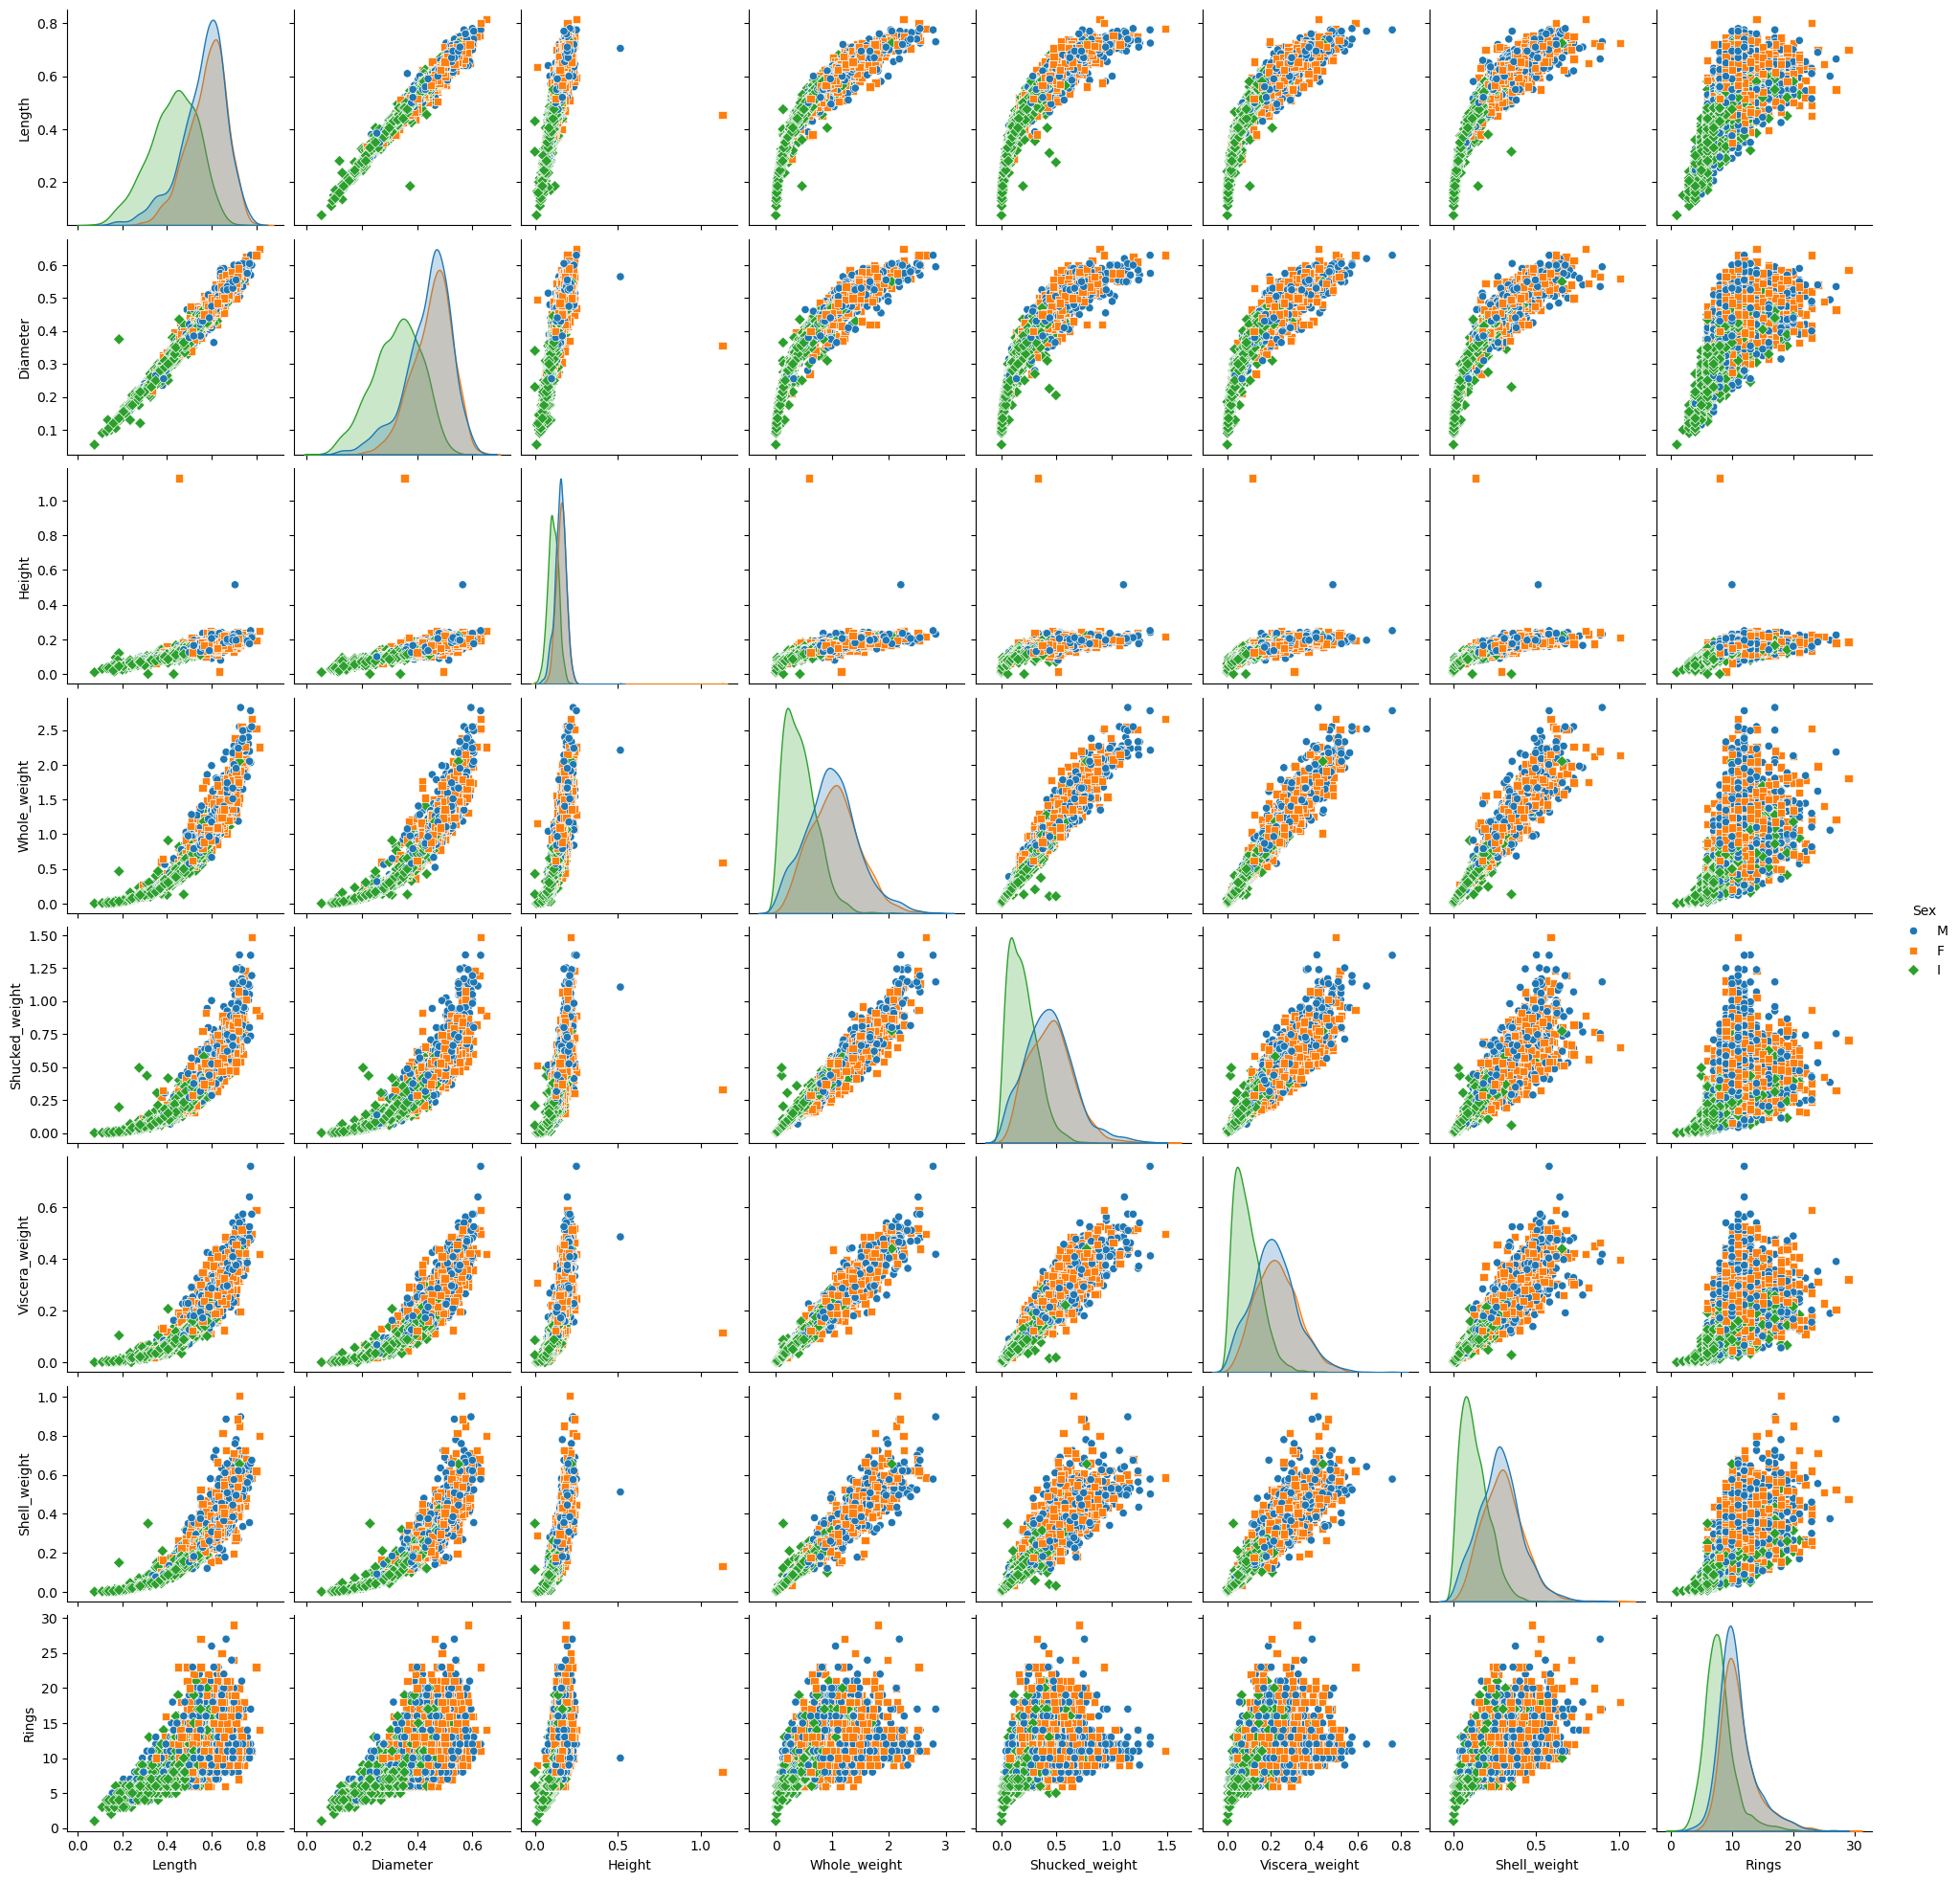

In [4]:
sns.pairplot(data_df, hue='Sex', markers=["o", "s", "D"])

In [9]:
# # Replace values
# x['Sex'] = x['Sex'].replace({'M': 0, 'F': 1, 'I': 2})

# # Explicitly convert to integer type
# x['Sex'] = x['Sex'].astype(int)
# sex = x[['Sex']]  # second
# x = x[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]  # first

encoder = OneHotEncoder(sparse_output=False)    
x_encoded = encoder.fit_transform(x[['Sex']])
df_encoded = encoder.fit_transform(data_df[['Sex']])  
x_encoded_df = pd.DataFrame(x_encoded, columns=encoder.get_feature_names_out(['Sex']))
df_encoded_df = pd.DataFrame(df_encoded, columns=encoder.get_feature_names_out(['Sex']))
x = x.drop(columns=['Sex']).join(x_encoded_df)
data_df = data_df.drop(columns=['Sex']).join(df_encoded_df)


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
df_scaled = scaler.fit_transform(data_df)
x = pd.DataFrame(x_scaled, columns=x.columns)
data_df = pd.DataFrame(df_scaled, columns=data_df.columns)
x.head()
data_df.head()

# df = pd.DataFrame(x, columns=['Sex-M', 'Sex-F', 'Sex-I', 'Length', 'Diameter', 	'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight',	'Shell_weight', 'Rings'])

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,-0.674834,-0.688018,1.316677
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,-0.674834,-0.688018,1.316677
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,1.481846,-0.688018,-0.759488
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,-0.674834,-0.688018,1.316677
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,-0.674834,1.453451,-0.759488


In [19]:
# mean_height = x.loc[x['Height'] != 0, 'Height'].mean()

# x.loc[x['Height'] == 0, 'Height'] = mean_height

In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole_weight    4177 non-null   float64
 4   Shucked_weight  4177 non-null   float64
 5   Viscera_weight  4177 non-null   float64
 6   Shell_weight    4177 non-null   float64
 7   Rings           4177 non-null   float64
 8   Sex_F           4177 non-null   float64
 9   Sex_I           4177 non-null   float64
 10  Sex_M           4177 non-null   float64
dtypes: float64(11)
memory usage: 359.1 KB


In [9]:
data_df.describe() # describe

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,8.505419e-17,-4.252710e-17,-7.144552e-17,1.169495e-17
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-2.771180e+00,-6.748338e-01,-6.880179e-01,-7.594876e-01
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-5.998184e-01,-6.748338e-01,-6.880179e-01,-7.594876e-01
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-2.896238e-01,-6.748338e-01,-6.880179e-01,-7.594876e-01
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,3.307653e-01,1.481846e+00,1.453451e+00,1.316677e+00
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,5.914268e+00,1.481846e+00,1.453451e+00,1.316677e+00


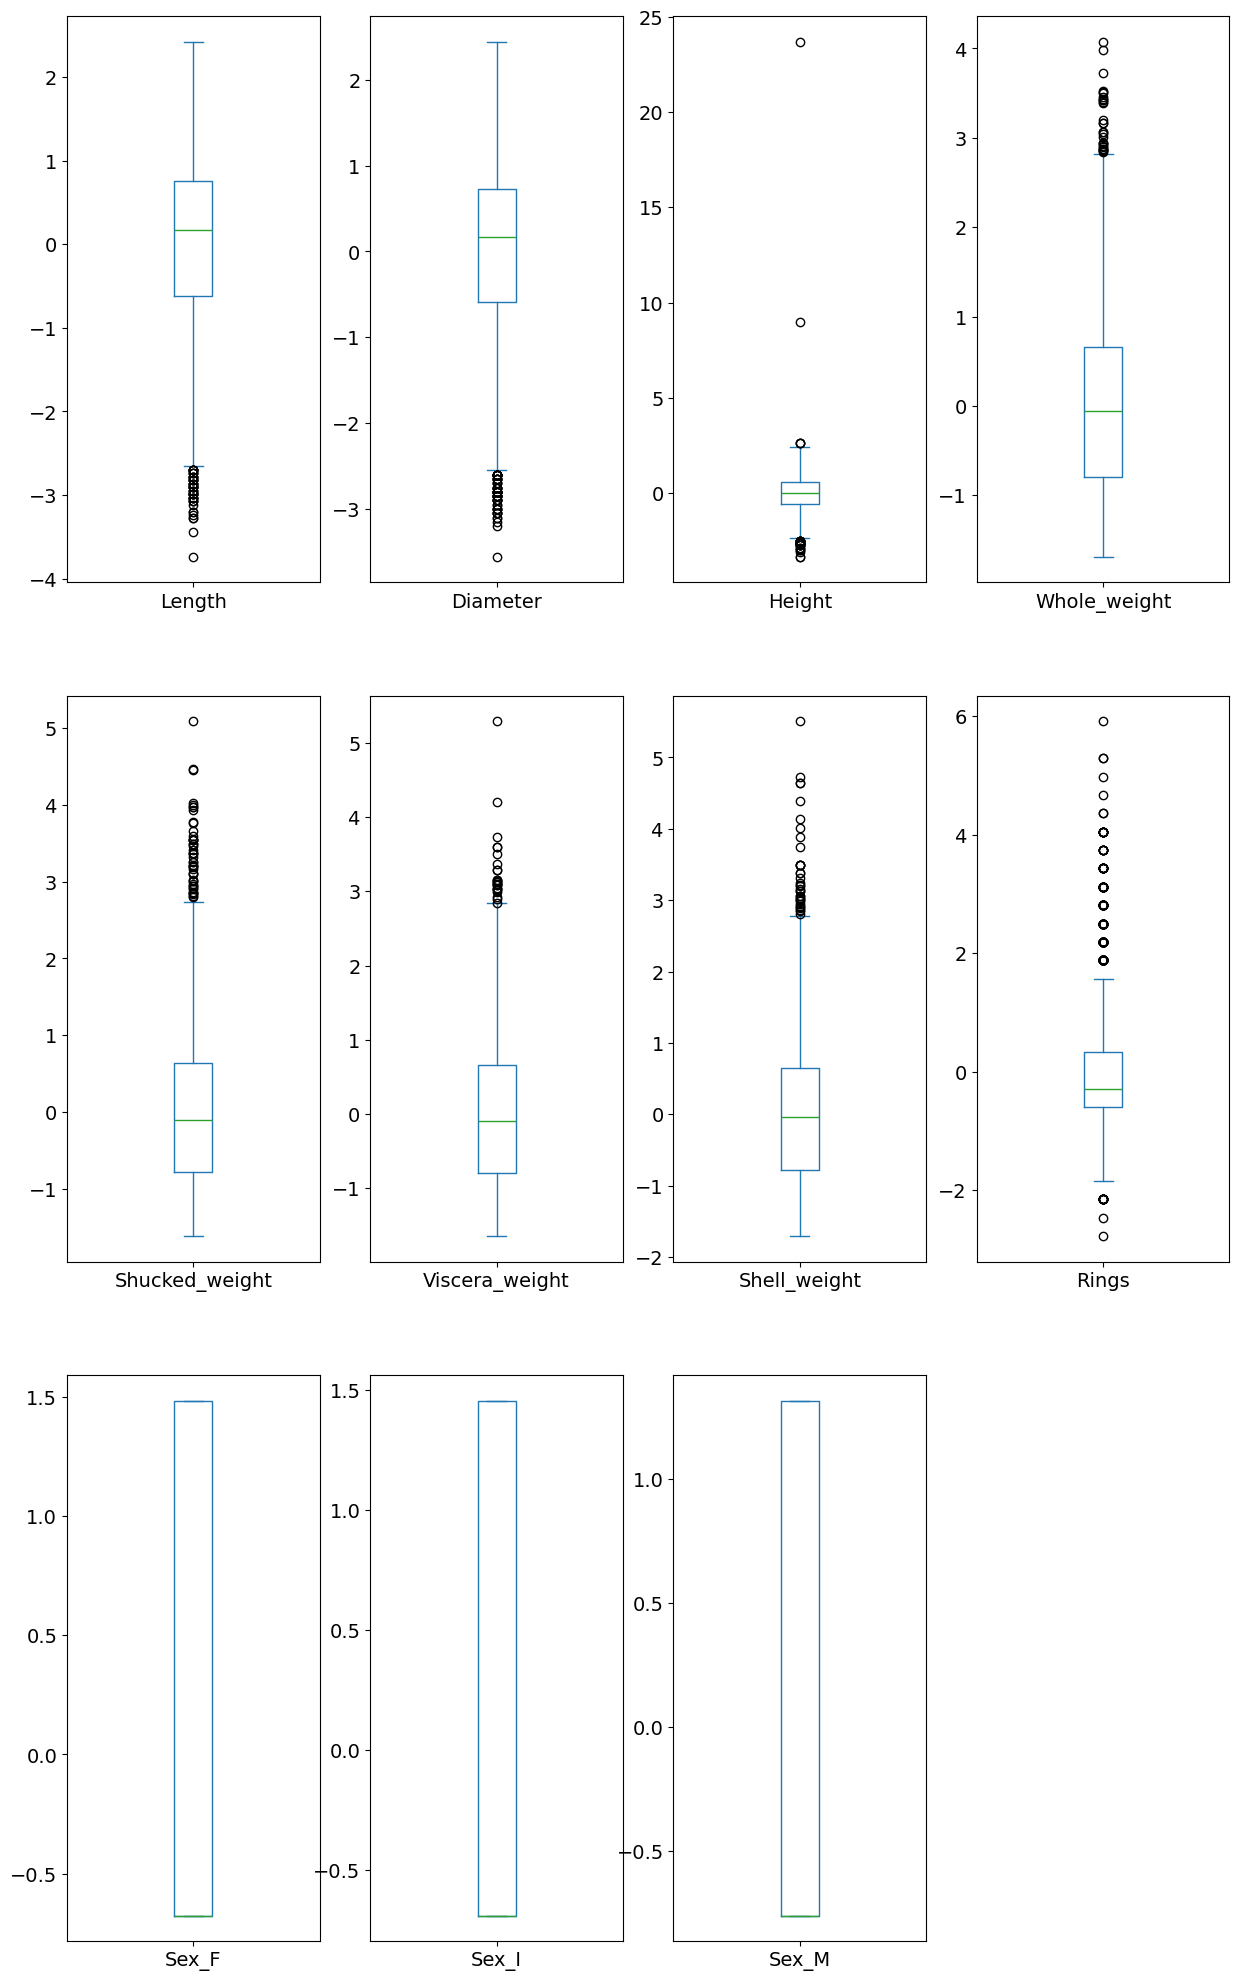

In [10]:
data_mean = data_df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(3,4), sharex=False, 
sharey=False, fontsize=14, figsize=(15,25));

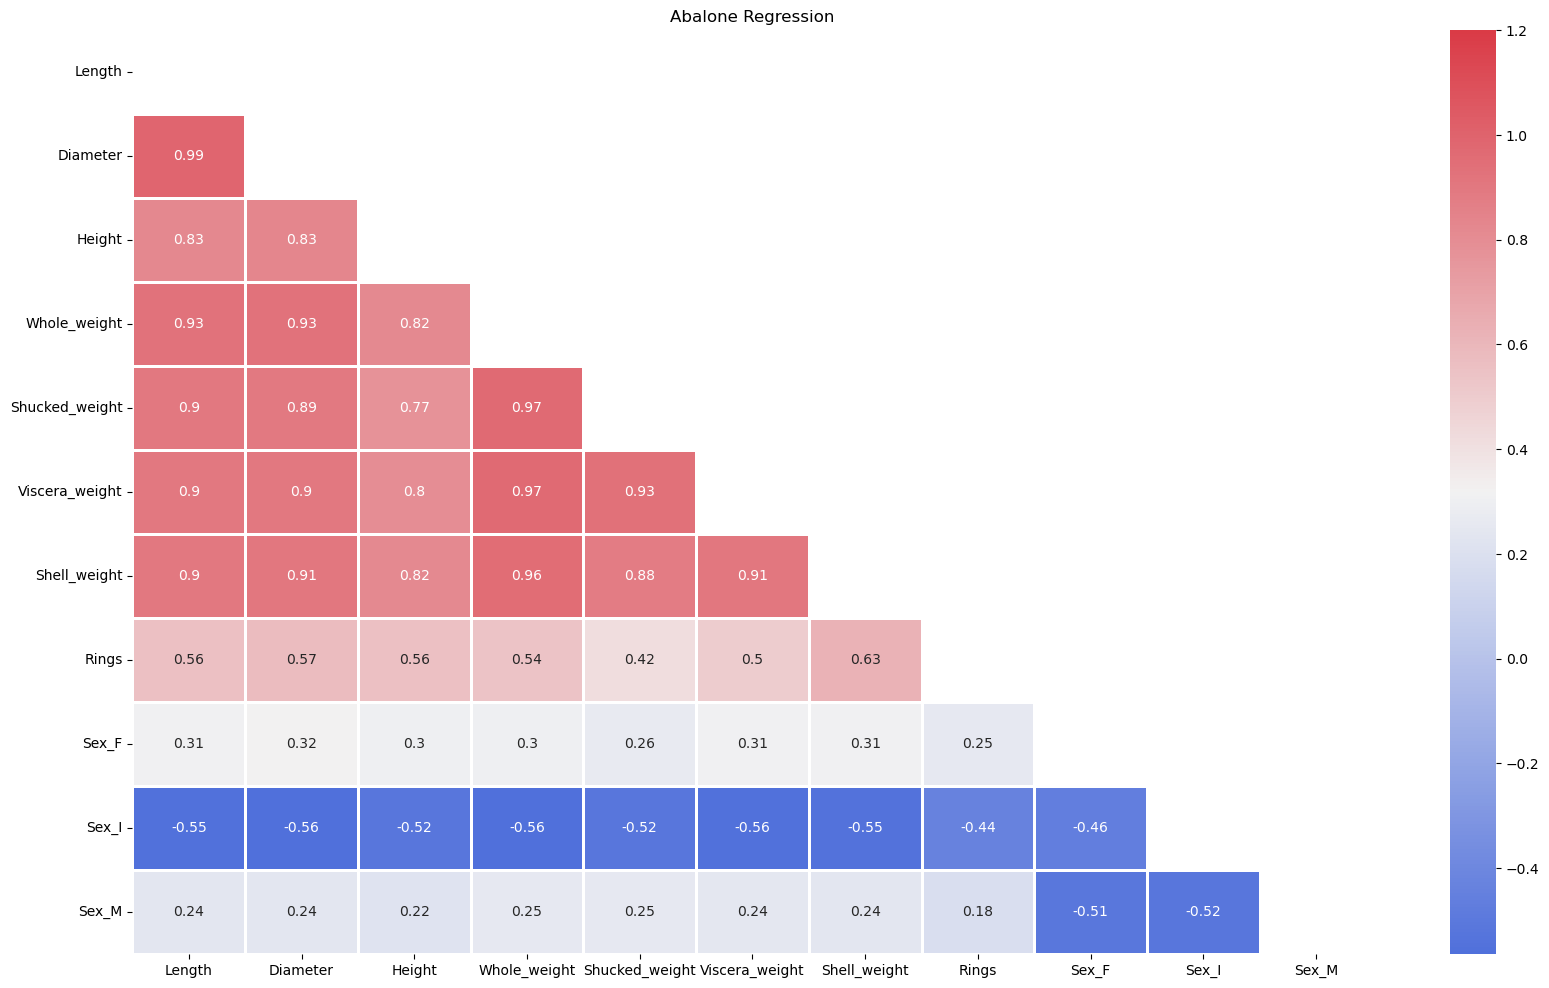

In [11]:
corrMatt = data_df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Abalone Regression')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [10]:
# data_df['volume'] = np.pi * data_df['Length'] * data_df['Diameter'] * data_df['Height'] / 6 / 1000
data_df = data_df.drop(columns=['Length'])
x = x.drop(columns=['Length'])
# data_df = data_df.drop(columns=['Diameter']) # Reduce the strong importance of the columns
# data_df = data_df.drop(columns=['Height'])
print(data_df)

      Diameter    Height  Whole_weight  Shucked_weight  Viscera_weight  \
0    -0.432149 -1.064424     -0.641898       -0.607685       -0.726212   
1    -1.439929 -1.183978     -1.230277       -1.170910       -1.205221   
2     0.122130 -0.107991     -0.309469       -0.463500       -0.356690   
3    -0.432149 -0.347099     -0.637819       -0.648238       -0.607600   
4    -1.540707 -1.423087     -1.272086       -1.215968       -1.287337   
...        ...       ...           ...             ...             ...   
4172  0.424464  0.609334      0.118813        0.047908        0.532900   
4173  0.323686 -0.107991      0.279929        0.358808        0.309362   
4174  0.676409  1.565767      0.708212        0.748559        0.975413   
4175  0.777187  0.250672      0.541998        0.773341        0.733627   
4176  1.482634  1.326659      2.283681        2.640993        1.787449   

      Shell_weight     Rings     Sex_F     Sex_I     Sex_M  
0        -0.638217  1.571544 -0.674834 -0.688018  

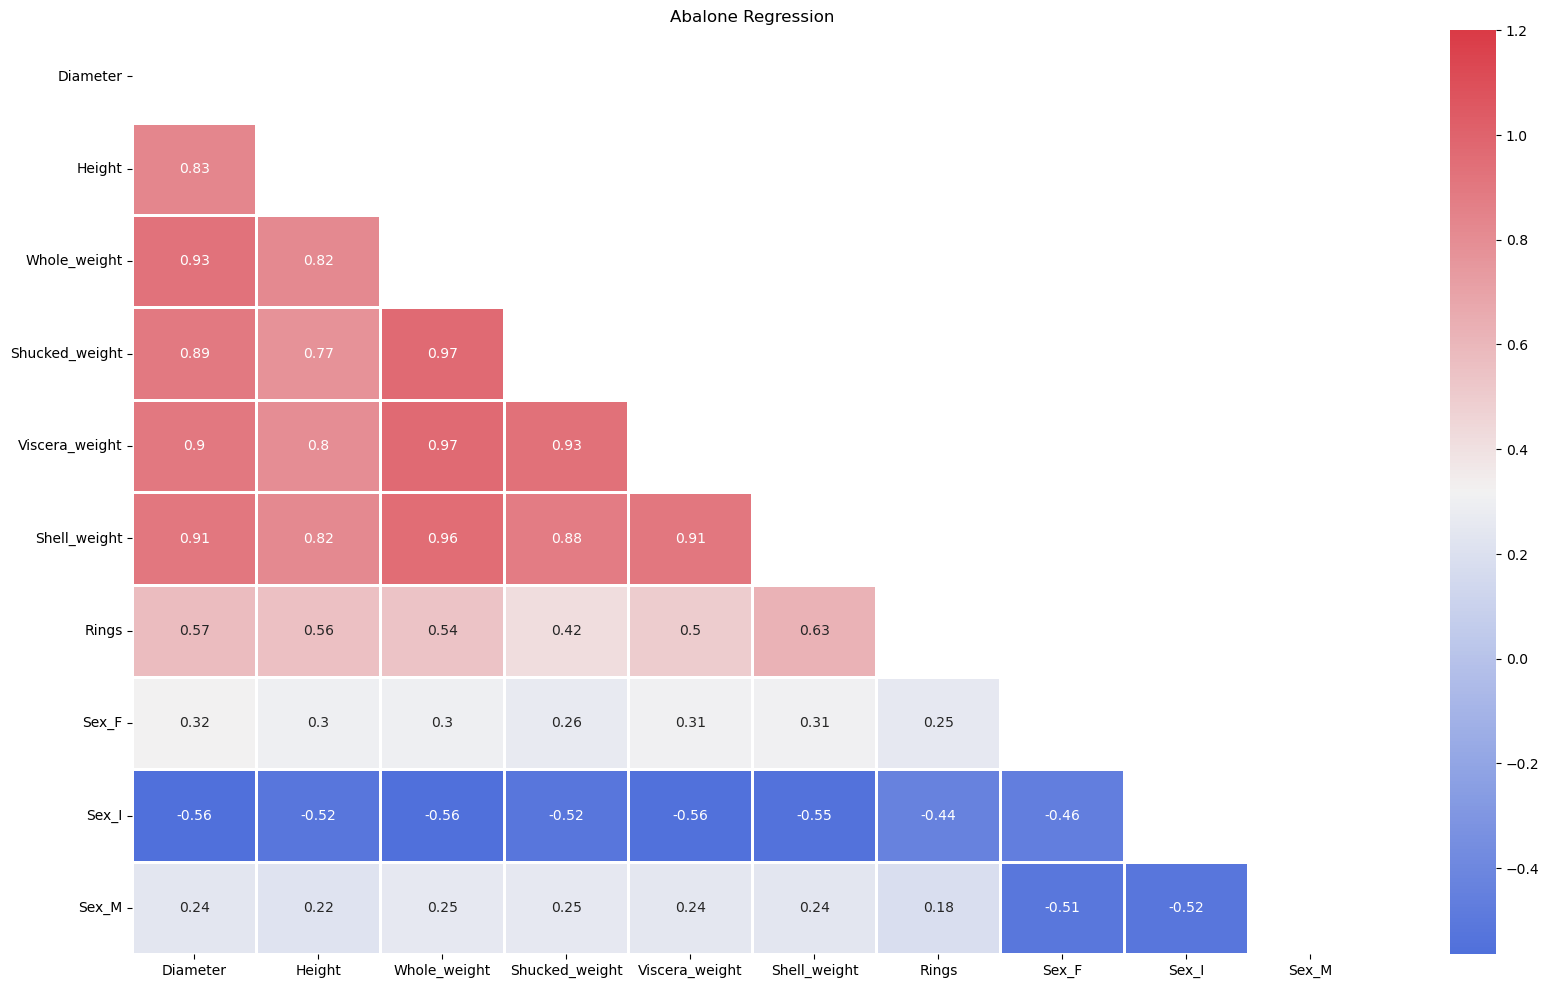

In [13]:
corrMatt = data_df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Abalone Regression')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [11]:
# Regression function
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

ys = y.values.ravel()

def regression(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100, "%")
    
    y_pred = model.predict(x)
    # calculate MSE
    mse = mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

regression(lr, x, y)

# cross-validation
n_folds = 5
scores = cross_val_score(lr, x, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

Accuracy: 54.54624942681804 %
Mean Squared Error: 4.808403616160543
[0.43025367 0.20366478 0.49271849 0.51894021 0.45063651]
Average score and standard deviation: (41.9243 +- 5.01673)%


In [13]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(criterion="squared_error", max_depth=5)

regression(dtr, x, y)

# cross-validation
n_folds = 5
scores = cross_val_score(dtr, x, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

Accuracy: 49.412511917635946 %
Mean Squared Error: 4.799491714137598
[0.34676226 0.16049562 0.44646469 0.46690001 0.43866657]
Average score and standard deviation: (37.1858 +- 5.07411)%


In [14]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', gamma='scale', C=100, epsilon=0.5)

regression(svr, x, y)

# cross-validation
n_folds = 5
scores = cross_val_score(svr, x, y, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 54.98934187921052 %
Mean Squared Error: 4.183816794635637


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[0.40610211 0.48503266 0.50911002 0.57704048 0.55655712]
Average score and standard deviation: (50.6768 +- 2.68542)%


In [20]:
from sklearn.neural_network import MLPRegressor

xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.25, random_state=42)
mlp_reg = MLPRegressor(hidden_layer_sizes=(64, 32, 16, 8), max_iter=500, learning_rate_init=0.0015, batch_size=80).fit(xs_train, ys_train)

regressor_score = mlp_reg.score(xs_test, ys_test)
print('The regression accuracy score of MLP is {:03.2f}'.format(regressor_score))

# cross-validation
n_folds = 5
scores = cross_val_score(mlp_reg, x, ys, cv=5)
print(scores)
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

D:\Anaconda\envs\MLE\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The regression accuracy score of MLP is 0.56
[ 0.4364057  -0.03094193  0.4465186   0.54551028  0.53269058]
Average score and standard deviation: (38.6037 +- 9.52902)%


D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\envs\MLE\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
D:\Anaconda\envs\MLE\lib\site-packages\sklearn

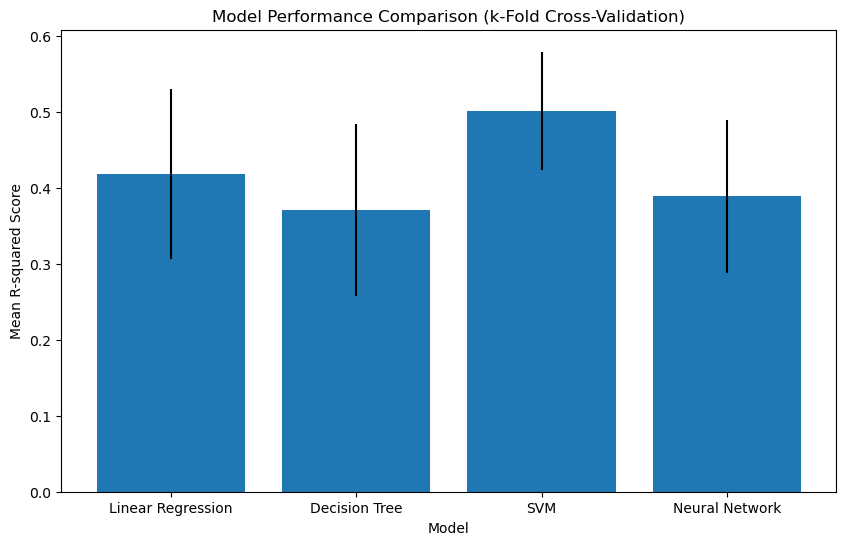

In [83]:
# Setting up k for k-fold cross-validation
k = 5

# Initializing dictionary to store cross-validation results
cv_results = {
    "Model": ["Linear Regression", "Decision Tree", "SVM", "Neural Network"],
    "Mean Cross-Validation Score": [],
    "Standard Deviation": []
}

# Running k-fold cross-validation for each model
for model, name in zip([lr, dtr, svr, mlp_reg], cv_results["Model"]):
    scores = cross_val_score(model, x_scaled, y, cv=k, scoring='r2')
    cv_results["Mean Cross-Validation Score"].append(scores.mean())
    cv_results["Standard Deviation"].append(scores.std())

# Converting results to DataFrame
cv_results_df = pd.DataFrame(cv_results)

# Plotting the cross-validation results
plt.figure(figsize=(10, 6))
plt.bar(cv_results_df["Model"], cv_results_df["Mean Cross-Validation Score"], yerr=cv_results_df["Standard Deviation"])
plt.title("Model Performance Comparison (k-Fold Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("Mean R-squared Score")
plt.show()